# Lab 05-3: Logistic Regression/Classification 를 TensorFlow로 구현하기

## 핵심키워드
- 로지스틱 회귀 / 분류(Logistic Regression / Classification)
- 가설(Hypothesis)
- 시그모이드 / 로지스틱(Sigmoid / Logistic)
- 비용 함수(Cost function)
- 최적화(Optimization)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f'>>> original : tf - 2.4.0  |  np - 1.19.4')
print(f'>>> present  : tf - {tf.__version__}  |  np - {np.__version__}')

>>> original : tf - 2.4.0  |  np - 1.19.4
>>> present  : tf - 2.4.0  |  np - 1.19.4


## Data

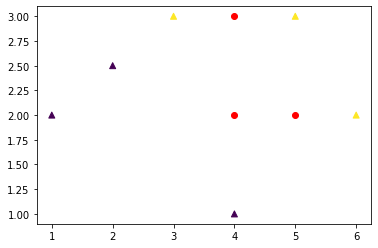

In [ ]:
# x_train = [[1., 2.],
#           [2., 3.],
#           [3., 1.],
#           [4., 3.],
#           [5., 3.],
#           [6., 2.]]
x_train = [[1., 2.],
          [2., 2.5],
          [4., 1.],
          [3., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.],
          [4, 2],
          [4, 3]]
y_test = [[1.],
          [1],
          [1]]


# Visualize data
x1 = [i[0] for i in x_train]
x2 = [i[1] for i in x_train]
colors = [i[0]%3 for i in y_train]
plt.scatter(x1, x2, c=colors, marker='^')

x1_test = [i[0] for i in x_test]
x2_test = [i[1] for i in x_test]
plt.scatter(x1_test, x2_test, c='red')

plt.show()

## Logistic Regression

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

# hypothesis function
def logistic_reg(features):
  z = tf.matmul(features, W) + b
  return tf.divide(1, 1 + tf.exp(-z))

# cost function
def loss_fn(hypothesis, labels):
  loss = -tf.reduce_mean( tf.multiply(labels, tf.math.log(hypothesis)) + tf.multiply(1-labels, tf.math.log(1-hypothesis)) )
  return loss

# gradient function
def grad(features, labels, W, b):
  with tf.GradientTape() as tape:
    hypothesis = logistic_reg(features)
    loss = loss_fn(hypothesis, labels)
  W_grad, b_grad = tape.gradient(loss, [W, b])
  return W_grad, b_grad

# optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# metric
def accuracy_fn(hypothesis, labels):
  pred = tf.cast(hypothesis>0.5, dtype=tf.float32)
  acc = tf.reduce_mean(tf.cast(tf.equal(pred, labels), dtype=tf.int32))
  return acc

# train model (update weights)
for step in range(2000 + 1):  # epoch
  for features, labels in iter(dataset):  # batch
    grads = grad(features, labels, W, b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
  
  # verbose
  if step%200==0:
    loss = loss_fn(logistic_reg(features), labels)
    print(f'Iter : {step:5} | Loss : {loss:6.4f}')

test_acc = accuracy_fn(logistic_reg(x_test), y_test).numpy()
print(f'Testset Accuracy : {test_acc:.4f}')

Iter :     0 | Loss : 1.0464
Iter :   200 | Loss : 0.6107
Iter :   400 | Loss : 0.5878
Iter :   600 | Loss : 0.5683
Iter :   800 | Loss : 0.5507
Iter :  1000 | Loss : 0.5343
Iter :  1200 | Loss : 0.5188
Iter :  1400 | Loss : 0.5041
Iter :  1600 | Loss : 0.4901
Iter :  1800 | Loss : 0.4767
Iter :  2000 | Loss : 0.4640
Testset Accuracy : 1.0000


## Summary
- Prediction process
 - X → $ z = θ^TX $ (Linear function) → $ g(z) =1/(1+ \exp^{-z}) $ (Logistic function) → $ g(z) > 0.5 $ (Decision boundary) →  $ H(x) ∈ \{0, 1\} $
<br><br>
- Cost function
 - $ Cost(h_θ(x), y) = -y\log(h_θ(x)) -(1-y)\log(1-h_θ(x)) $
<br><br>
- The prediction process of logistic regression is similar to the process of each cell in basic Deep Neural Network, which will be discussed later in the course.
 - $ \textrm{Input} → \textrm{Linear Transformation} → \textrm{Activation} → \textrm{Output} $